<a href="https://colab.research.google.com/github/Arnav-Barman/UML501-ML/blob/main/Assignment3_ArnavBarman_3CO15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#Load Data Using Standard Python Script
import csv
import numpy as np
import pandas as pd
from pandas import read_csv as rc
awc = rc("/content/AWCustomers.csv")
aws = rc("/content/AWSales.csv")
awtc = rc("/content/AWTest-Classification.csv", header=None)
awtr = rc("/content/AWTest-Regression.csv", header=None)


In [54]:
awcs = pd.merge(awc,aws)
awcs.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,M,M,1,3,0,1,81916,2017-03-06,1,50.97
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,M,M,1,2,1,2,81076,2017-03-06,1,53.11
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,...,F,S,0,3,0,0,86387,2017-03-06,1,54.08
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,...,M,M,1,2,1,2,61481,2017-03-06,1,56.93
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,...,M,S,1,1,0,0,51804,2017-03-06,1,55.41


---
## Assignment:
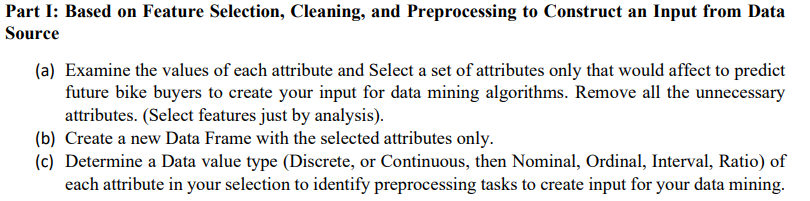
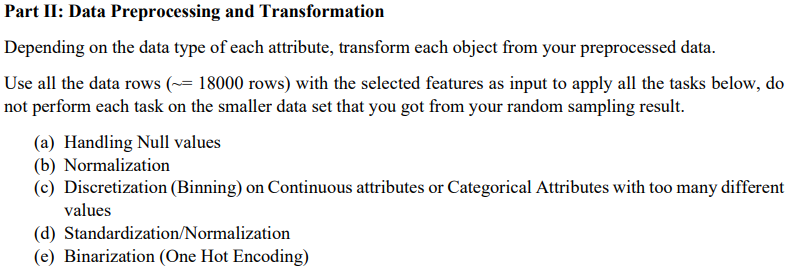
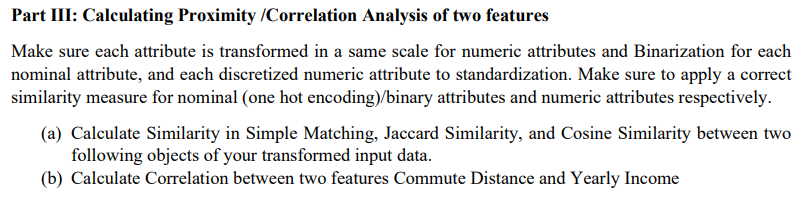

---

In [55]:
awcs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18361 entries, 0 to 18360
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            18361 non-null  int64  
 1   Title                 101 non-null    object 
 2   FirstName             18361 non-null  object 
 3   MiddleName            10572 non-null  object 
 4   LastName              18361 non-null  object 
 5   Suffix                3 non-null      object 
 6   AddressLine1          18361 non-null  object 
 7   AddressLine2          311 non-null    object 
 8   City                  18361 non-null  object 
 9   StateProvinceName     18361 non-null  object 
 10  CountryRegionName     18361 non-null  object 
 11  PostalCode            18361 non-null  object 
 12  PhoneNumber           18361 non-null  object 
 13  BirthDate             18361 non-null  object 
 14  Education             18361 non-null  object 
 15  Occupation         

In [56]:
awcs['City'].nunique()

269

In [57]:
awcs['StateProvinceName'].nunique()

54

In [58]:
awcs['CountryRegionName'].nunique()

6

In [59]:
awcs['BikeBuyer'].nunique()

2

In [60]:
awcs.drop(['CustomerID','Title','FirstName','MiddleName','LastName','Suffix','AddressLine1','AddressLine2','PostalCode','PhoneNumber','Occupation','LastUpdated','City','StateProvinceName','TotalChildren'],axis = 1, inplace = True)
awcs.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18361 entries, 0 to 18360
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CountryRegionName     18361 non-null  object 
 1   BirthDate             18361 non-null  object 
 2   Education             18361 non-null  object 
 3   Gender                18361 non-null  object 
 4   MaritalStatus         18361 non-null  object 
 5   HomeOwnerFlag         18361 non-null  int64  
 6   NumberCarsOwned       18361 non-null  int64  
 7   NumberChildrenAtHome  18361 non-null  int64  
 8   YearlyIncome          18361 non-null  int64  
 9   BikeBuyer             18361 non-null  int64  
 10  AvgMonthSpend         18361 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 1.7+ MB


In [61]:
awcs.head()

,CountryRegionName,BirthDate,Education,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,BikeBuyer,AvgMonthSpend
0,Australia,1987-11-13,Bachelors,M,M,1,3,0,81916,1,50.97
1,Canada,1972-07-21,Partial College,M,M,1,2,1,81076,1,53.11
2,United States,1985-11-09,Bachelors,F,S,0,3,0,86387,1,54.08
3,United Kingdom,1977-10-18,Partial College,M,M,1,2,1,61481,1,56.93
4,Germany,1975-02-05,Partial College,M,S,1,1,0,51804,1,55.41


In [62]:
#Changing birthdate to age for easier analsis
import datetime as dt
def calcAge(x):
    x = dt.datetime.strptime(x, "%Y-%m-%d").date()
    today = dt.date.today()
    return today.year - x.year - ((today.month, today.day) < (x.month, x.day))

awcs['age'] = awcs['BirthDate'].apply(calcAge)
awcs = awcs.drop('BirthDate',axis = 1)
awcs.head(1)

,CountryRegionName,Education,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,BikeBuyer,AvgMonthSpend,age
0,Australia,Bachelors,M,M,1,3,0,81916,1,50.97,34


In [63]:
#checking if we have any NULL values
awcs.isnull().sum()

CountryRegionName       0
Education               0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
YearlyIncome            0
BikeBuyer               0
AvgMonthSpend           0
age                     0
dtype: int64

In [64]:
awcs.dropna()

,CountryRegionName,Education,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,BikeBuyer,AvgMonthSpend,age
0,Australia,Bachelors,M,M,1,3,0,81916,1,50.97,34
1,Canada,Partial College,M,M,1,2,1,81076,1,53.11,50
2,United States,Bachelors,F,S,0,3,0,86387,1,54.08,36
3,United Kingdom,Partial College,M,M,1,2,1,61481,1,56.93,44
4,Germany,Partial College,M,S,1,1,0,51804,1,55.41,47
...,...,...,...,...,...,...,...,...,...,...,...
18356,United States,Graduate Degree,F,M,0,1,0,52953,0,48.14,31
18357,Australia,Bachelors,F,S,0,2,0,60992,1,50.23,29
18358,United States,Partial College,F,S,0,2,0,51859,1,49.56,38
18359,Canada,High School,F,S,0,0,0,87177,0,51.42,27


Checking unique/number of unique values we have for most of the remaining columns

In [65]:
awcs['Education'].unique()

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [66]:
awcs['HomeOwnerFlag'].unique()

array([1, 0])

In [67]:
awcs['NumberCarsOwned'].unique()

array([3, 2, 1, 0, 4, 5])

In [68]:
awcs['NumberChildrenAtHome'].unique()

array([0, 1, 2, 3])

In [69]:
awcs['age'].nunique()

72

---

In [70]:
awcs.head()

,CountryRegionName,Education,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,BikeBuyer,AvgMonthSpend,age
0,Australia,Bachelors,M,M,1,3,0,81916,1,50.97,34
1,Canada,Partial College,M,M,1,2,1,81076,1,53.11,50
2,United States,Bachelors,F,S,0,3,0,86387,1,54.08,36
3,United Kingdom,Partial College,M,M,1,2,1,61481,1,56.93,44
4,Germany,Partial College,M,S,1,1,0,51804,1,55.41,47


In [71]:
#Changing male to 1, female to 0, single to 1, married to 0, and mapping values of education to integers.
awcs.loc[awcs["Gender"] == "M", "Gender"] = 1
awcs.loc[awcs["Gender"] == "F", "Gender"] = 0
awcs.loc[awcs["MaritalStatus"] == "M", "MaritalStatus"] = 0
awcs.loc[awcs["MaritalStatus"] == "S", "MaritalStatus"] = 1
awcs['Education']=awcs['Education'].map({'Partial High School':1,'High School':2,'Partial College':3,'Bachelors':4,'Graduate Degree':5})

In [72]:
CountryRegionName = pd.get_dummies(awcs.CountryRegionName)
awcs = pd.concat([awcs,CountryRegionName],axis = 'columns')
awcs.drop('CountryRegionName',axis = 1, inplace = True)

In [73]:
awcs.head()

,Education,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,BikeBuyer,AvgMonthSpend,age,Australia,Canada,France,Germany,United Kingdom,United States
0,4,1,0,1,3,0,81916,1,50.97,34,1,0,0,0,0,0
1,3,1,0,1,2,1,81076,1,53.11,50,0,1,0,0,0,0
2,4,0,1,0,3,0,86387,1,54.08,36,0,0,0,0,0,1
3,3,1,0,1,2,1,61481,1,56.93,44,0,0,0,0,1,0
4,3,1,1,1,1,0,51804,1,55.41,47,0,0,0,1,0,0


In [74]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
awcs['YearlyIncome'] = pd.qcut(awcs.YearlyIncome,q=5)
awcs['YearlyIncome']= le.fit_transform(awcs['YearlyIncome'])
awcs.head()

,Education,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,BikeBuyer,AvgMonthSpend,age,Australia,Canada,France,Germany,United Kingdom,United States
0,4,1,0,1,3,0,3,1,50.97,34,1,0,0,0,0,0
1,3,1,0,1,2,1,3,1,53.11,50,0,1,0,0,0,0
2,4,0,1,0,3,0,3,1,54.08,36,0,0,0,0,0,1
3,3,1,0,1,2,1,2,1,56.93,44,0,0,0,0,1,0
4,3,1,1,1,1,0,1,1,55.41,47,0,0,0,1,0,0
